### In this notebook i will do some explorations and prediction based on the data we have. This is the data of Product Shipment Tracking. I want to discover key insights from their customer database. I want to use some of the most advanced machine learning techniques to study their customers. 

### There are two main questions to ask when we work on this dataset:

+ What was Customer Rating? And What criteria that the product will be delivered on time?
+ If Product importance is high. having higest rating or being delivered on time?

#### Data Source:
https://www.kaggle.com/prachi13/customer-analytics

# A. Importing Library dan dataset

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import  confusion_matrix
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
df = pd.read_csv("Train.csv")
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [33]:
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


### The dataset used for model building contained 10999 observations of 12 variables.

### The data contains the following information:

+ ID: ID Number of Customers.
+ Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
+ Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.
+ Customer care calls: The number of calls made from enquiry for enquiry of the shipment.
+ Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
+ Cost of the product: Cost of the Product in US Dollars.
+ Prior purchases: The Number of Prior Purchase.
+ Product importance: The company has categorized the product in the various parameter such as low, medium, high.
+ Gender: Male and Female.
+ Discount offered: Discount offered on that specific product.
+ Weight in gms: It is the weight in grams.
+ Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

# B. Data Cleaning

## 1. Missing Value Handling

In [34]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

### There is no missing value in our data

## 2. Additional Feature

### I will add another discount feature (in percentage rather than in price)

In [35]:
df['Discount_offered_%']=100*df['Discount_offered']/df['Cost_of_the_Product']

In [36]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Discount_offered_%
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,24.858757
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,27.314815
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,26.229508
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,5.681818
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,25.000000


## 3. Label Encoding (For EDA)

In [37]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [38]:
comm= df.copy()
for col in comm.select_dtypes(include='O').columns:
    comm[col]=le.fit_transform(comm[col])

In [39]:
comm.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Discount_offered_%
0,1,3,0,4,2,177,3,1,0,44,1233,1,24.858757
1,2,4,0,4,5,216,2,1,1,59,3088,1,27.314815
2,3,0,0,2,2,183,4,1,1,48,3374,1,26.229508
3,4,1,0,3,3,176,4,2,1,10,1177,1,5.681818
4,5,2,0,2,2,184,3,2,0,46,2484,1,25.000000


# C. Exploratory Data Analysis

## 1. Statistics Descriptive

In [40]:
def summary(df,column):
    print("Distinct : ",len(pd.unique(df[column])))
    print("Missing : ",df[column].isnull().sum())
    print("Sum : ",df[column].sum())
    print("Mode : ",st.mode(df[column]))
    print("stddev : ",np.std(df[column]))
    print("CV :",100*(np.std(df[column]))/(np.mean(df[column]))) #coefficient of variation
    print("Min : ",df[column].min())
    print("Max : ",df[column].max())
    print("Mean : ",df[column].mean())
    print("Q1 : ",np.quantile(df[column],0.25))
    print("Q1 : ",np.quantile(df[column],0.5))
    print("Q1 : ",np.quantile(df[column],0.75))
    
    
def values(df,column):
    for i in df[column].unique():
        print(i)


def values_df(df):
    for i in df.columns:
        print(i)
        for j in df[i].unique():
            print(j)
        print("-"*20)
        
def proportion(df,column):
    for i in df[column].unique():
        counts = (sum(df[column]==i)/df[column].count()) *100
        print (i,' dengan proporsi {}%'.format(counts))

#### Let's see a brief statistical description of the data

In [41]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Discount_offered_%
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691,7.023666
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584,9.268773
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000,0.322581
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000,1.754386
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000,3.333333
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000,6.296459
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000,63.636364


#### Or it can be seen from the encoded data:

In [42]:
comm.describe()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Discount_offered_%
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,2.333394,1.516865,4.054459,2.990545,210.196836,3.567597,1.346031,0.495863,13.373216,3634.016729,0.596691,7.023666
std,3175.28214,1.490726,0.756894,1.141490,1.413603,48.063272,1.522860,0.631434,0.500006,16.205527,1635.377251,0.490584,9.268773
min,1.00000,0.000000,0.000000,2.000000,1.000000,96.000000,2.000000,0.000000,0.000000,1.000000,1001.000000,0.000000,0.322581
25%,2750.50000,1.000000,1.000000,3.000000,2.000000,169.000000,3.000000,1.000000,0.000000,4.000000,1839.500000,0.000000,1.754386
50%,5500.00000,3.000000,2.000000,4.000000,3.000000,214.000000,3.000000,1.000000,0.000000,7.000000,4149.000000,1.000000,3.333333
75%,8249.50000,4.000000,2.000000,5.000000,4.000000,251.000000,4.000000,2.000000,1.000000,10.000000,5050.000000,1.000000,6.296459
max,10999.00000,4.000000,2.000000,7.000000,5.000000,310.000000,10.000000,2.000000,1.000000,65.000000,7846.000000,1.000000,63.636364


In [43]:
for i in comm.columns:
    print (i,'\n')
    summary(comm,i)
    print("-"*30)

ID 

Distinct :  10999
Missing :  0
Sum :  60494500
Mode :  1
stddev :  3175.1377922855568
CV : 57.729778041555576
Min :  1
Max :  10999
Mean :  5500.0
Q1 :  2750.5
Q1 :  5500.0
Q1 :  8249.5
------------------------------
Warehouse_block 

Distinct :  5
Missing :  0
Sum :  25665
Mode :  4
stddev :  1.4906577701448205
CV : 63.88367353915013
Min :  0
Max :  4
Mean :  2.333393944904082
Q1 :  1.0
Q1 :  3.0
Q1 :  4.0
------------------------------
Mode_of_Shipment 

Distinct :  3
Missing :  0
Sum :  16684
Mode :  2
stddev :  0.7568592007221914
CV : 49.89627396753406
Min :  0
Max :  2
Mean :  1.5168651695608693
Q1 :  1.0
Q1 :  2.0
Q1 :  2.0
------------------------------
Customer_care_calls 

Distinct :  6
Missing :  0
Sum :  44595
Mode :  4
stddev :  1.1414377553154325
CV : 28.152649110246532
Min :  2
Max :  7
Mean :  4.054459496317847
Q1 :  3.0
Q1 :  4.0
Q1 :  5.0
------------------------------
Customer_rating 

Distinct :  5
Missing :  0
Sum :  32893
Mode :  3
stddev :  1.4135389093311594

## 2. Imbalanced Dataset Checking (Checking Target Class Proportion)

### We see our target value distribution

In [44]:
proportion(comm,'Reached.on.Time_Y.N')

1  dengan proporsi 59.66906082371125%
0  dengan proporsi 40.33093917628875%


### It can be seen that the proportion or amount of data for each target class that we have is not too much different in number, so it is actually enough to avoid the problem of imbalanced datasets. But for the sake of perfection, i will add smote algorithm to handle this little imbalance.

# D. Data Visualization

## 1. Correlation Between Features In Data

### Let's see the heatmap correlation in the initial data

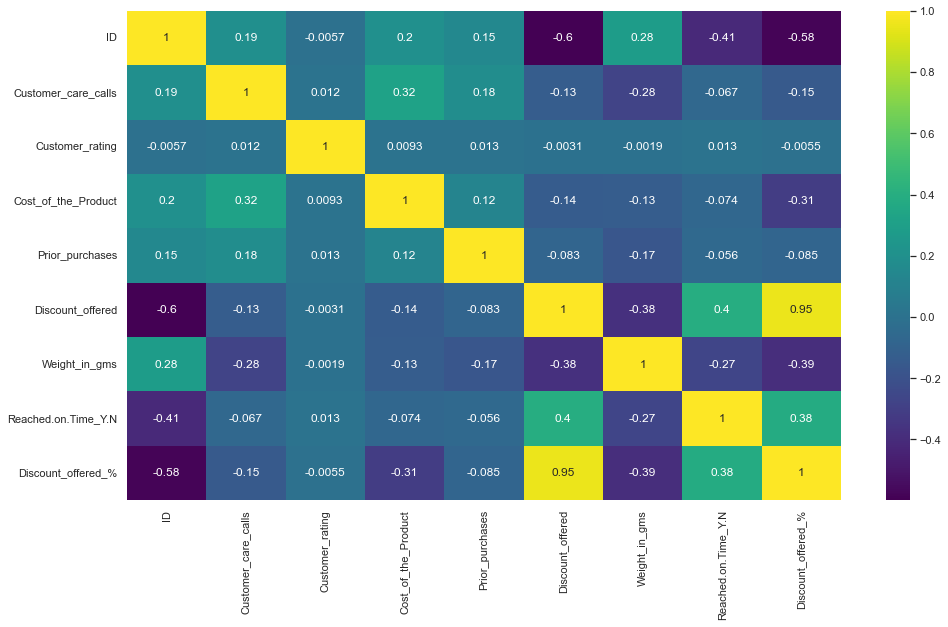

In [45]:
plt.figure(figsize=(16,9))
x = df.drop(['Warehouse_block','Mode_of_Shipment','Product_importance','Gender'],axis = 1)
ax = sns.heatmap(df.corr(),annot = True,cmap = 'viridis')
plt.show()

### Now let's try also on the data that has been encoded

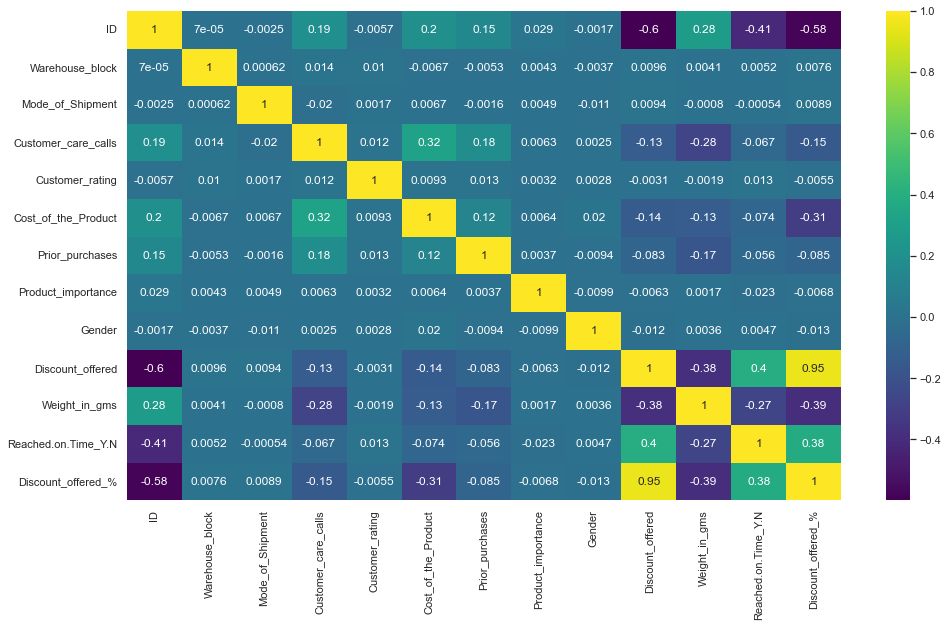

In [46]:
plt.figure(figsize=(16,9))
x = comm
ax = sns.heatmap(comm.corr(),annot = True,cmap = 'viridis')
plt.show()

### It can be seen that each feature in the data does not have a significant correlation in our target column, namely "Reached.on.Time_YN"

### The discount_offered feature has the largest correlation, which is 0.4 in the "Reached.on.Time_YN" feature, but this value does not show a strong enough correlation between the two features.

### There is no high correlation between features other than our additional feature (discount_offered in percentage). I will remove it later so we can avoid multicollinearity problem.

## 2. Basic Visualization

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10999 non-null  int64  
 1   Warehouse_block      10999 non-null  object 
 2   Mode_of_Shipment     10999 non-null  object 
 3   Customer_care_calls  10999 non-null  int64  
 4   Customer_rating      10999 non-null  int64  
 5   Cost_of_the_Product  10999 non-null  int64  
 6   Prior_purchases      10999 non-null  int64  
 7   Product_importance   10999 non-null  object 
 8   Gender               10999 non-null  object 
 9   Discount_offered     10999 non-null  int64  
 10  Weight_in_gms        10999 non-null  int64  
 11  Reached.on.Time_Y.N  10999 non-null  int64  
 12  Discount_offered_%   10999 non-null  float64
dtypes: float64(1), int64(8), object(4)
memory usage: 1.1+ MB


## 2.1. Warehouse_block Feature

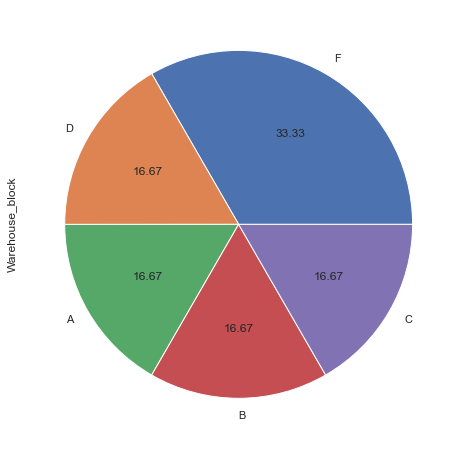

In [48]:
sns.set_theme(style='whitegrid')
sns.set(rc = {'figure.figsize':(13,8)})
df['Warehouse_block'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

### It can be seen that warehouse block F dominates our data

<Figure size 1440x576 with 0 Axes>

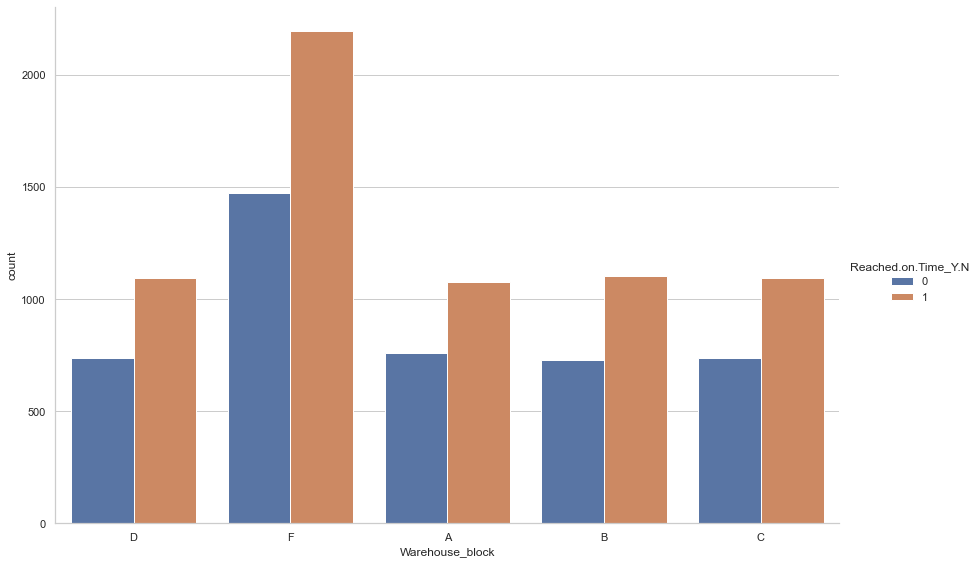

In [49]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='Warehouse_block',hue='Reached.on.Time_Y.N',data=df,kind="count",height=8, aspect=1.5)

### We can see from above that products that have been delivered to warehouse block F are not reached on time the most.

## 2.2. Mode_of_Shipment Feature

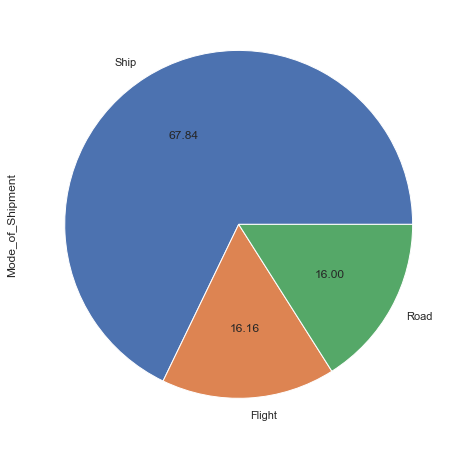

In [50]:
sns.set_theme(style='whitegrid')
sns.set(rc = {'figure.figsize':(13,8)})
df['Mode_of_Shipment'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

### We can see the number of products sent by ship is more than products sent by other modes of transportation

<Figure size 1440x576 with 0 Axes>

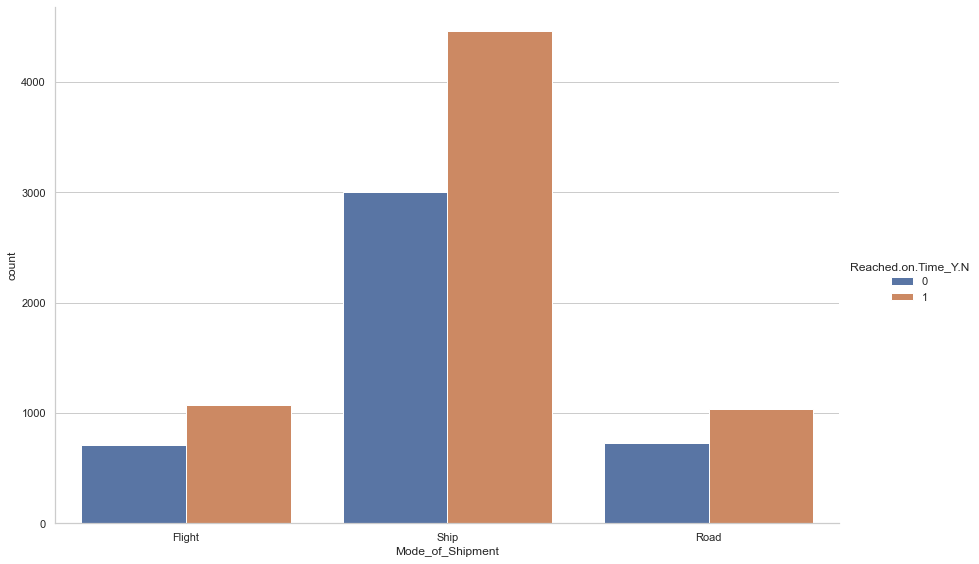

In [51]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='Mode_of_Shipment',hue='Reached.on.Time_Y.N',data=df,kind="count",height=8, aspect=1.5)

### And of course the delivery of products using ships are more late to arrive to customers.

## 2.3. Customer_care_calls Feature

<Figure size 1440x576 with 0 Axes>

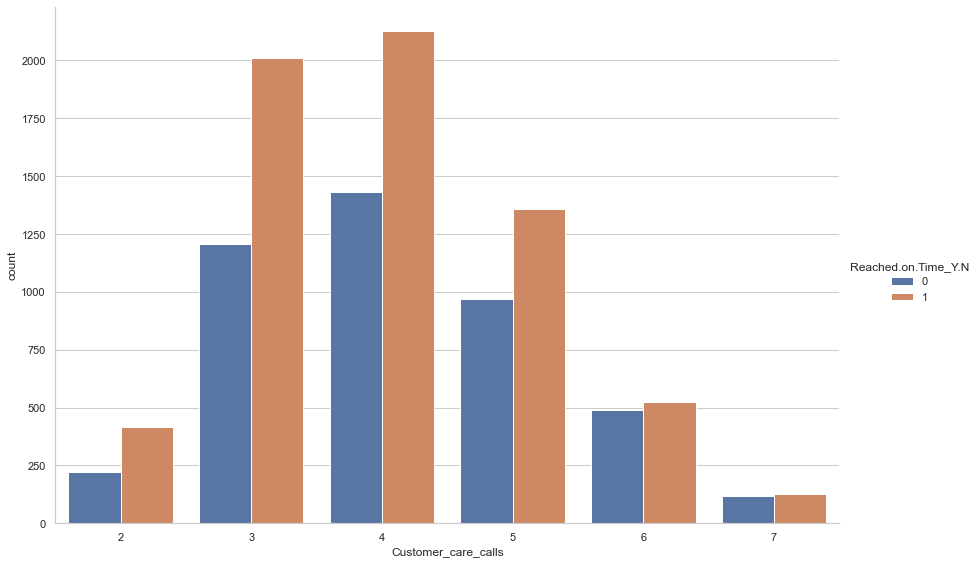

In [52]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='Customer_care_calls',hue='Reached.on.Time_Y.N',data=df,kind="count",height=8, aspect=1.5)


### We can see the number of customer care calls are dominated by 4 calls and from those 4 calls, the products related dominated the number of products which didn't reach on time.

## 2.4. Customer_rating Feature

<Figure size 1440x576 with 0 Axes>

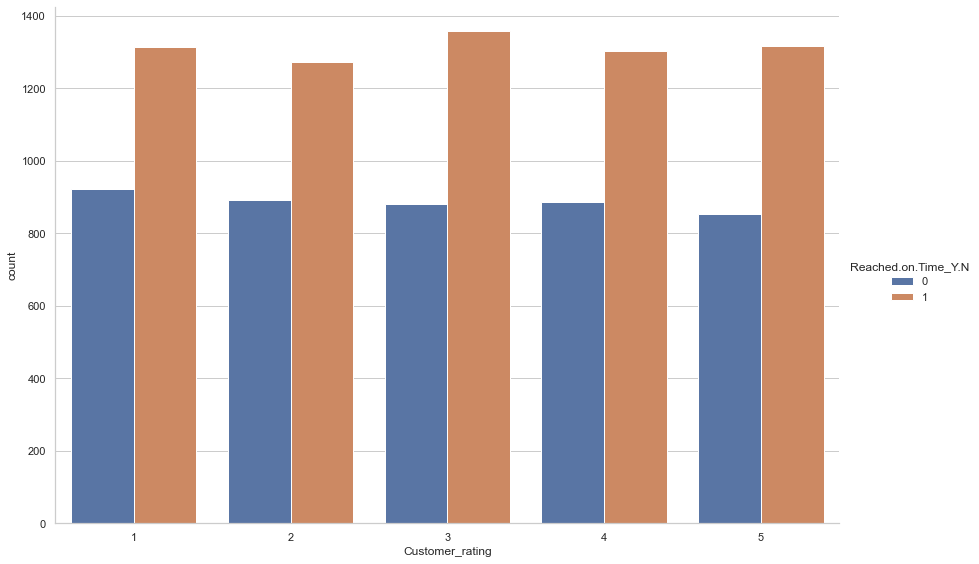

In [53]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='Customer_rating',hue='Reached.on.Time_Y.N',data=df,kind="count",height=8, aspect=1.5)

### Almost all ratings are equal in number.

## 2.5. Cost_of_the_Product Feature

<AxesSubplot:xlabel='Cost_of_the_Product', ylabel='Count'>

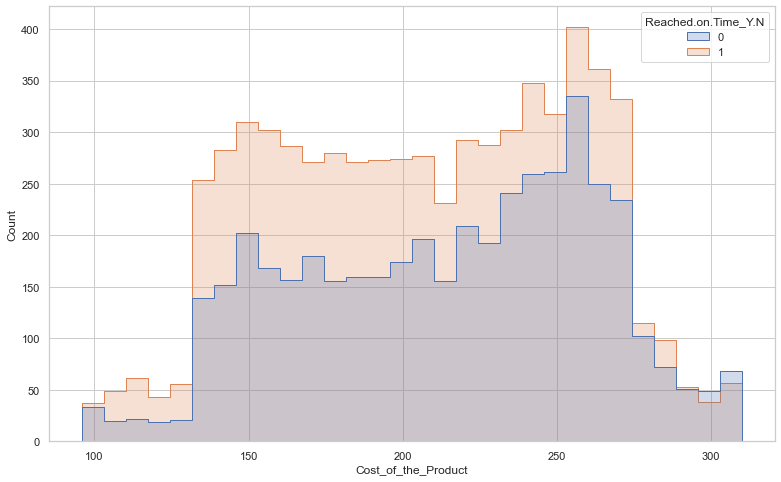

In [54]:
sns.histplot(data=df, x="Cost_of_the_Product",hue="Reached.on.Time_Y.N",element="step")

### From histogram above we can see that products with a price of around 250-280 dollars tend to arrive late

<AxesSubplot:xlabel='Reached.on.Time_Y.N', ylabel='Cost_of_the_Product'>

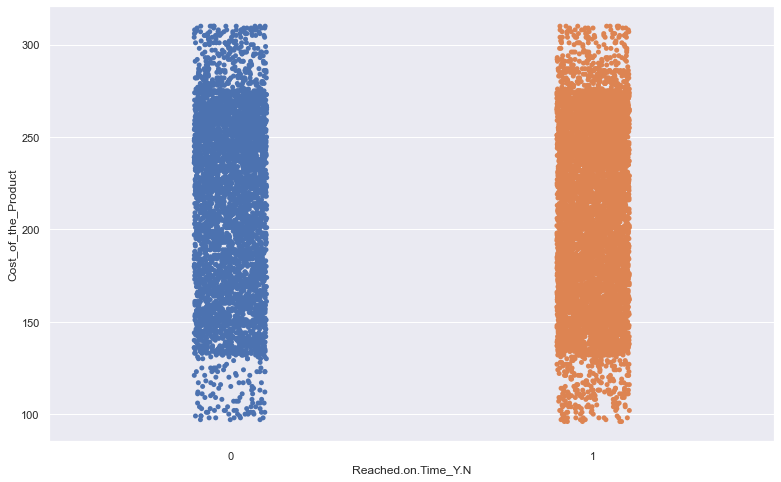

In [55]:
sns.set()

#create boxplot in each subplot
sns.stripplot(data=df, x='Reached.on.Time_Y.N', y='Cost_of_the_Product')

<AxesSubplot:xlabel='Cost_of_the_Product', ylabel='Discount_offered'>

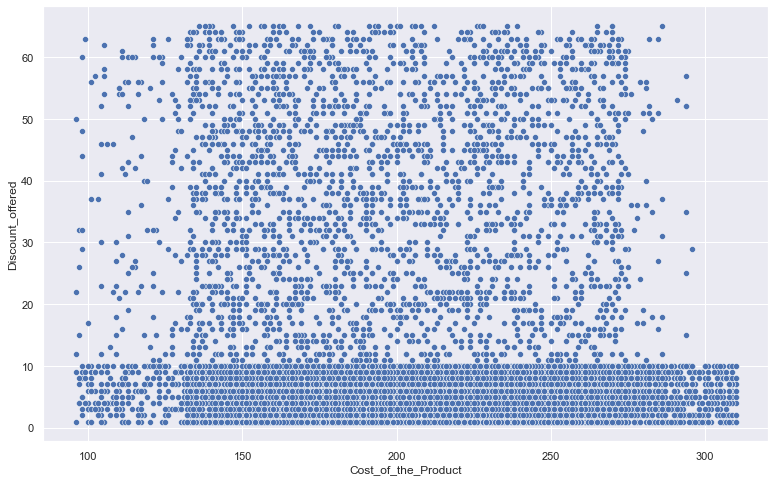

In [56]:
sns.scatterplot(data=df, x="Cost_of_the_Product", y="Discount_offered")

### And we can see the distribution of the data in space of discount_offered and cost of product. They are randomly distributed in space without making any pattern.

## 2.6. Prior_purchases Feature

<Figure size 1440x576 with 0 Axes>

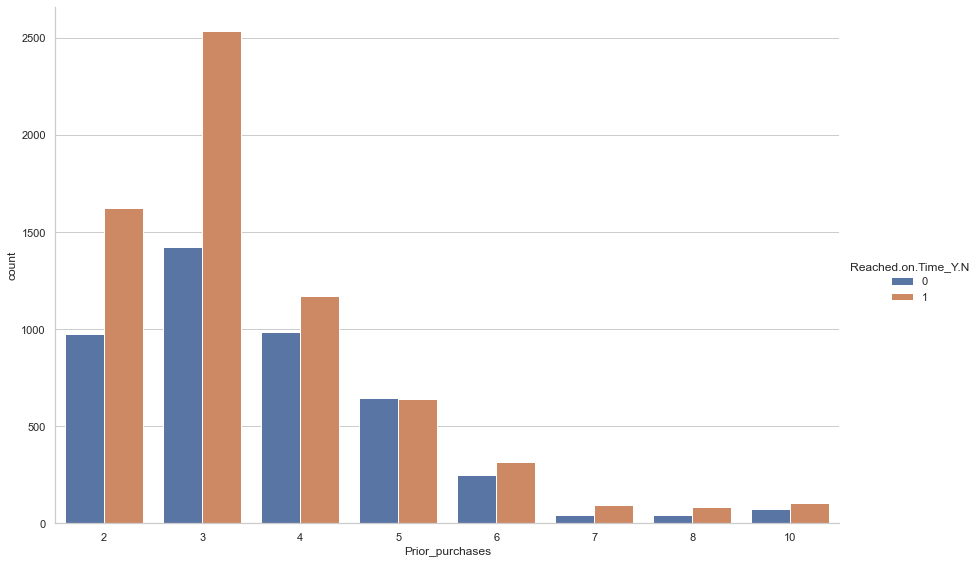

In [57]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='Prior_purchases',hue='Reached.on.Time_Y.N',data=df,kind="count",height=8, aspect=1.5)

### Our data is dominated by data with 3 prior purchases. Customer with 3 prior purchases product also tends to arrive late.

## 2.7. Product_importance Feature

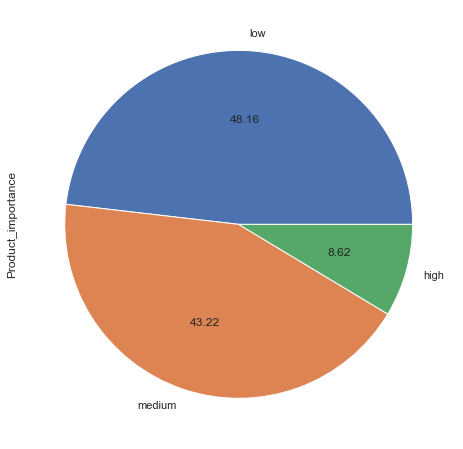

In [58]:
sns.set_theme(style='whitegrid')
sns.set(rc = {'figure.figsize':(13,8)})
df['Product_importance'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

### As usual our data is dominated by products with low importance level. Data of products with high importance level is the least.

<Figure size 1440x576 with 0 Axes>

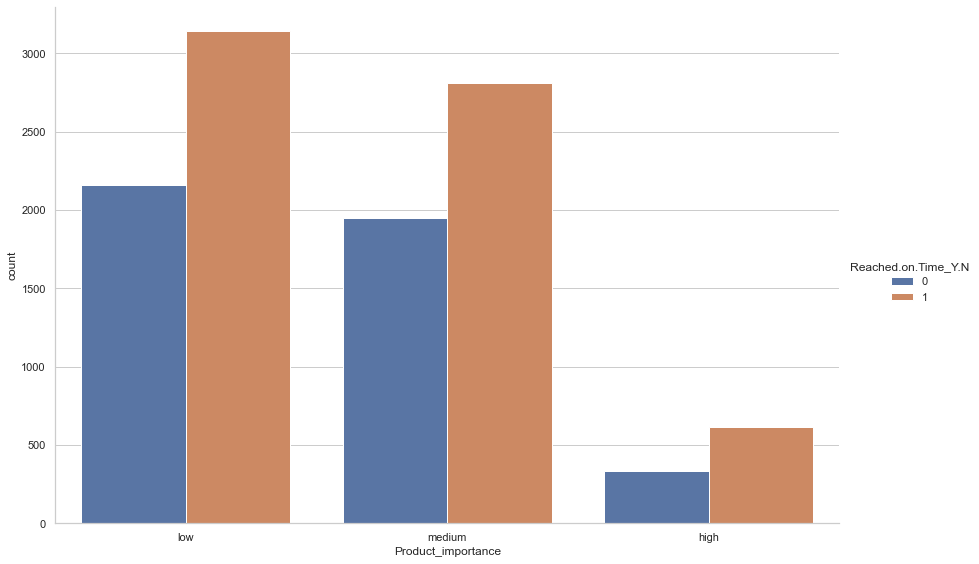

In [59]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='Product_importance',hue='Reached.on.Time_Y.N',data=df,kind="count",height=8, aspect=1.5)

### And of course products with low level of importance tend to arrive late to customer.

## 2.8. Gender Feature

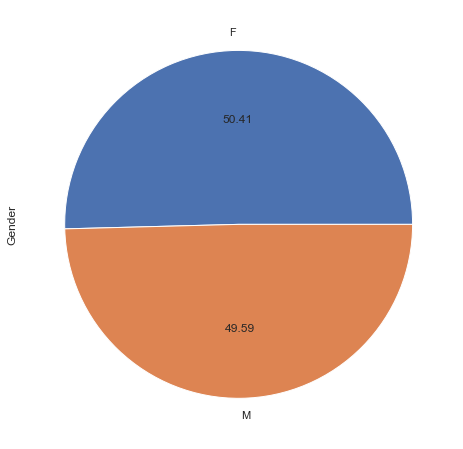

In [60]:
sns.set_theme(style='whitegrid')
sns.set(rc = {'figure.figsize':(13,8)})
df['Gender'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

### Our data is almost equal in gender context. Male and female are equal in our data.

<Figure size 1440x576 with 0 Axes>

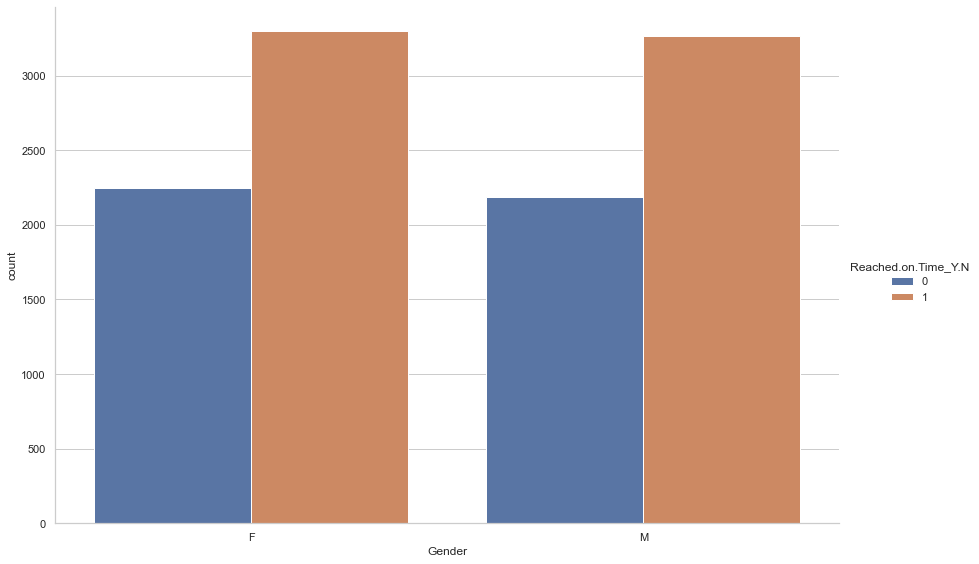

In [61]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='Gender',hue='Reached.on.Time_Y.N',data=df,kind="count",height=8, aspect=1.5)

### And also both genders' products tend to reached or arrived in customers' houses late.

## 2.9. Discount_offered Feature

<AxesSubplot:xlabel='Discount_offered', ylabel='Count'>

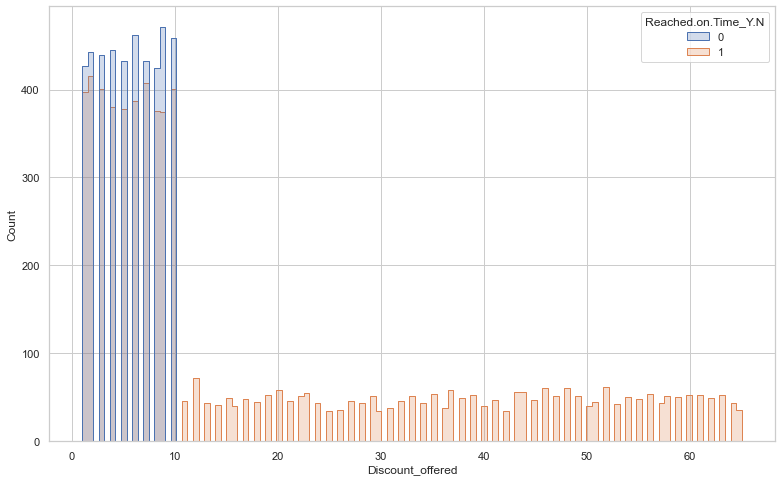

In [62]:
sns.histplot(data=df, x="Discount_offered",hue="Reached.on.Time_Y.N",element="step")

<AxesSubplot:xlabel='Reached.on.Time_Y.N', ylabel='Discount_offered_%'>

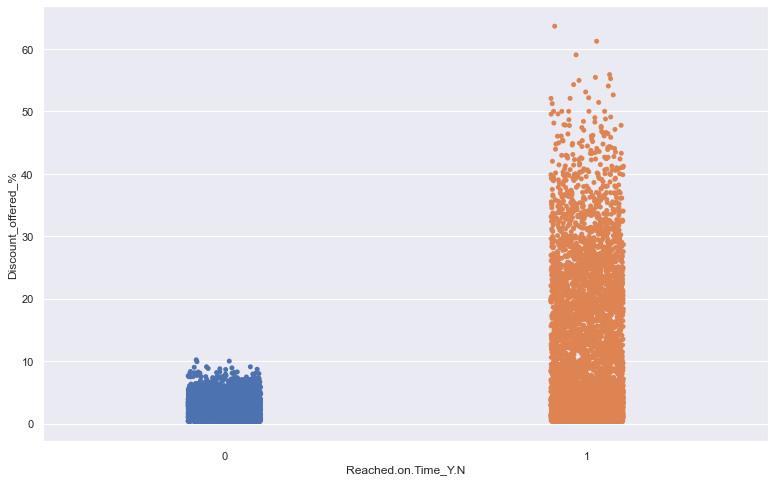

In [63]:
sns.set()


sns.stripplot(data=df, x='Reached.on.Time_Y.N', y='Discount_offered_%')

### Almost all the products that have been delivered are discounted for about 1-10%. And these 1-10% discounted products also tend to arrive late.

## 2.10. Weight_in_gms Feature

<AxesSubplot:xlabel='Weight_in_gms', ylabel='Count'>

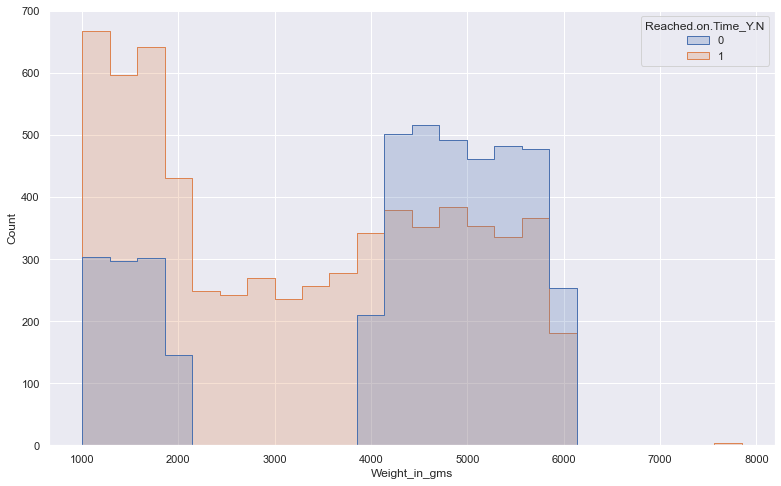

In [64]:
sns.histplot(data=df, x="Weight_in_gms",hue="Reached.on.Time_Y.N",element="step")

### Our data are dominated by products weighing 1000-2000 grams and they tend to arrive late. But here is the interesting thing, products weighing 2000-3900 grams never arrived or reached on time. I don't know why.

## 2.11. Reached on Time Feature

### We want to check how our target data is distributed

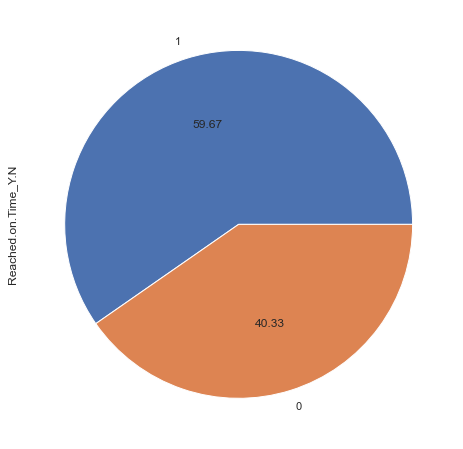

In [65]:
sns.set_theme(style='whitegrid')
sns.set(rc = {'figure.figsize':(13,8)})
df['Reached.on.Time_Y.N'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

### Like i said before that our target data is a little bit imbalanced. Reached.on.Time_Y.N feature has more negative value (1) than positive value (0).

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10999 non-null  int64  
 1   Warehouse_block      10999 non-null  object 
 2   Mode_of_Shipment     10999 non-null  object 
 3   Customer_care_calls  10999 non-null  int64  
 4   Customer_rating      10999 non-null  int64  
 5   Cost_of_the_Product  10999 non-null  int64  
 6   Prior_purchases      10999 non-null  int64  
 7   Product_importance   10999 non-null  object 
 8   Gender               10999 non-null  object 
 9   Discount_offered     10999 non-null  int64  
 10  Weight_in_gms        10999 non-null  int64  
 11  Reached.on.Time_Y.N  10999 non-null  int64  
 12  Discount_offered_%   10999 non-null  float64
dtypes: float64(1), int64(8), object(4)
memory usage: 1.1+ MB


## 3. Statistics Visualization

<AxesSubplot:xlabel='Reached.on.Time_Y.N', ylabel='Customer_rating'>

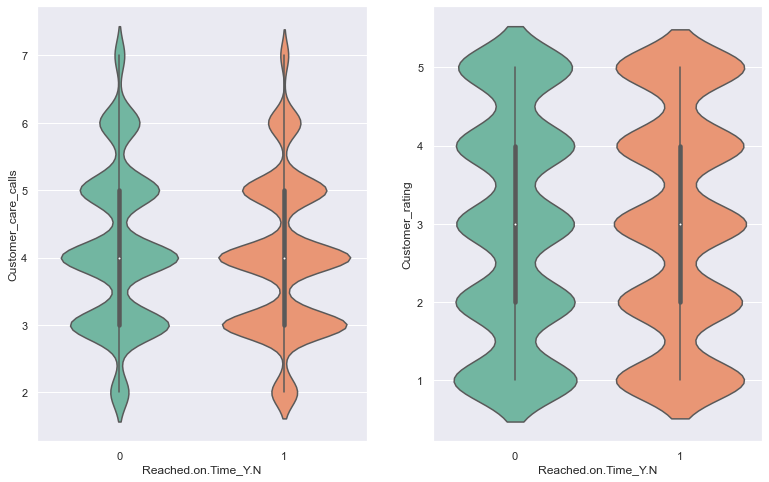

In [73]:
#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (1 row, 2 columns)
fig, axes = plt.subplots(1, 2)

#create boxplot in each subplot
sns.violinplot(data=df, x='Reached.on.Time_Y.N', y='Customer_care_calls',palette="Set2", ax=axes[0])
sns.violinplot(data=df, x='Reached.on.Time_Y.N', y='Customer_rating',palette="Set2" ,ax=axes[1])


<AxesSubplot:xlabel='Reached.on.Time_Y.N', ylabel='Discount_offered_%'>

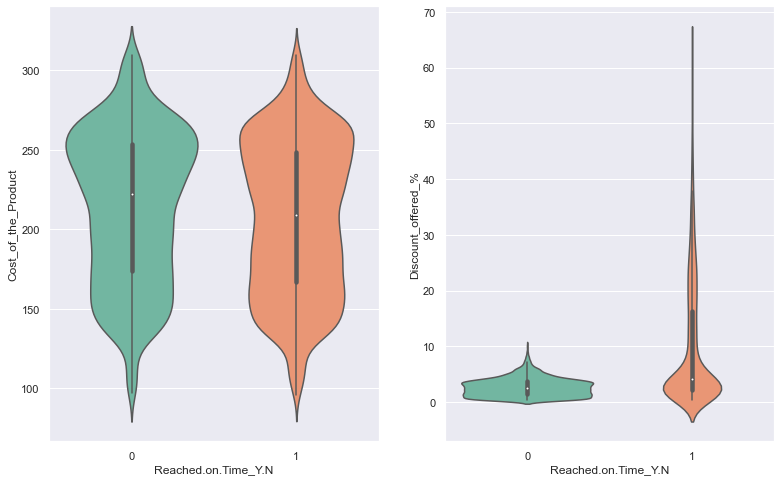

In [74]:
fig, axes = plt.subplots(1, 2)

#create boxplot in each subplot
sns.violinplot(data=df, x='Reached.on.Time_Y.N', y='Cost_of_the_Product',palette="Set2", ax=axes[0])
sns.violinplot(data=df, x='Reached.on.Time_Y.N', y='Discount_offered_%',palette="Set2", ax=axes[1])

<AxesSubplot:xlabel='Mode_of_Shipment', ylabel='Customer_rating'>

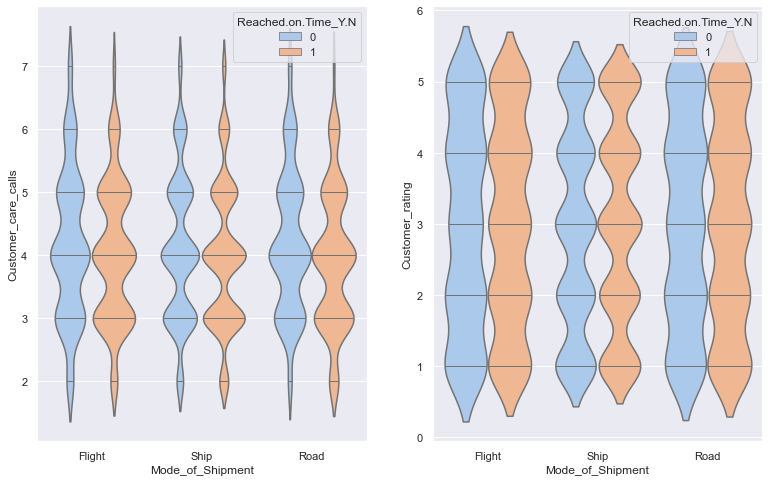

In [72]:
sns.set()

#define plotting region (1 row, 2 columns)
fig, axes = plt.subplots(1, 2)

#create boxplot in each subplot
sns.violinplot(data=df, x='Mode_of_Shipment', y='Customer_care_calls',hue='Reached.on.Time_Y.N',palette="pastel",inner="stick",ax=axes[0])
sns.violinplot(data=df, x='Mode_of_Shipment', y='Customer_rating',hue='Reached.on.Time_Y.N',palette="pastel",inner="stick" ,ax=axes[1])



<AxesSubplot:xlabel='Reached.on.Time_Y.N', ylabel='Discount_offered_%'>

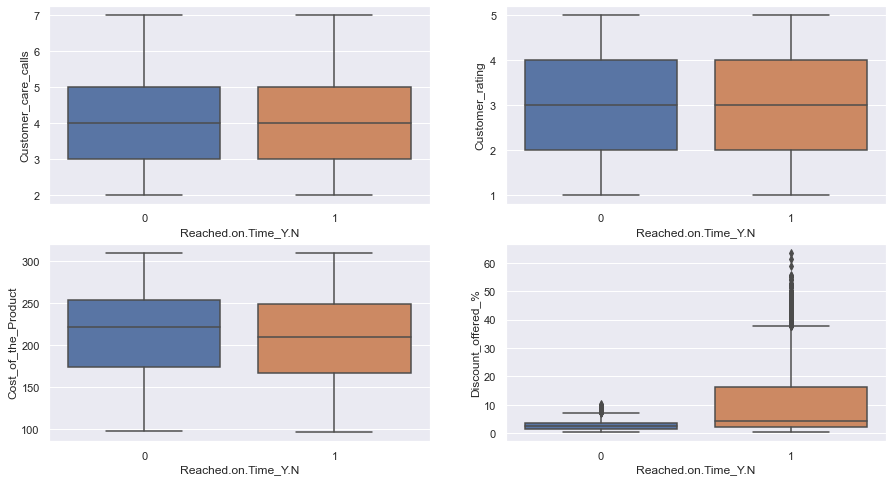

In [40]:
sns.set()

#define plotting region (2 rows, 2 columns)

fig, axes = plt.subplots(2, 2)

#create boxplot in each subplot
sns.boxplot(data=df, x='Reached.on.Time_Y.N', y='Customer_care_calls', ax=axes[0,0])
sns.boxplot(data=df, x='Reached.on.Time_Y.N', y='Customer_rating', ax=axes[0,1])
sns.boxplot(data=df, x='Reached.on.Time_Y.N', y='Cost_of_the_Product', ax=axes[1,0])
sns.boxplot(data=df, x='Reached.on.Time_Y.N', y='Discount_offered_%', ax=axes[1,1])

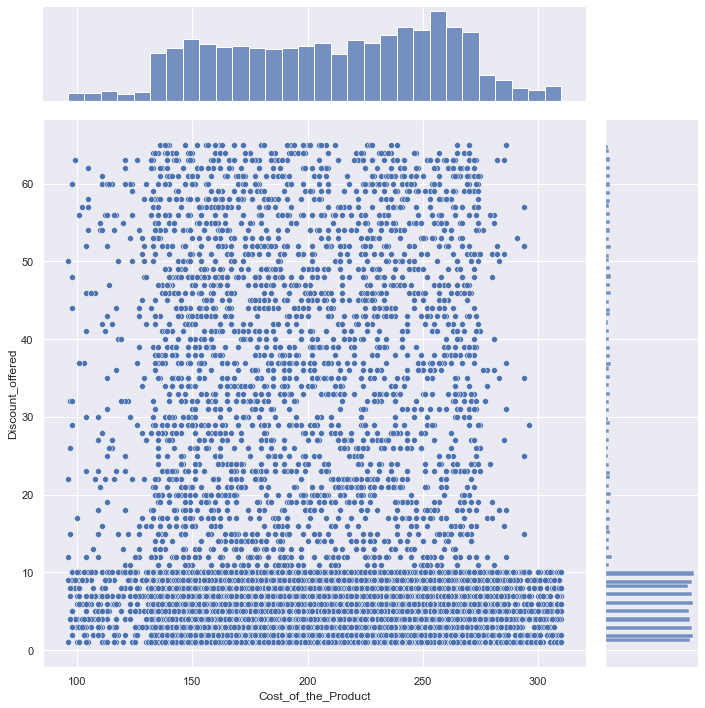

In [84]:
sns.set(rc = {'figure.figsize':(17,12)})
sns.jointplot(data=df, x="Cost_of_the_Product", y="Discount_offered",height=10)

# E. Data Preprocessing

## 1. Removing Unnecessary Feature

In [35]:
df = df.drop(["ID"],axis=1)

In [36]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Discount_offered_%
0,D,Flight,4,2,177,3,low,F,44,1233,1,24.858757
1,F,Flight,4,5,216,2,low,M,59,3088,1,27.314815
2,A,Flight,2,2,183,4,low,M,48,3374,1,26.229508
3,B,Flight,3,3,176,4,medium,M,10,1177,1,5.681818
4,C,Flight,2,2,184,3,medium,F,46,2484,1,25.000000


## 2. Checking For Outlier

In [37]:
df.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Discount_offered_%
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691,7.023666
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584,9.268773
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000,0.322581
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000,1.754386
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000,3.333333
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000,6.296459
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000,63.636364


### From the statistical description of the data, the "Weight_in_gms" feature looks a little suspicious, we will check whether there are outliers in these features.

### We check for outliers using the Interquartile Range (IQR).

In [38]:
Q12 = df['Weight_in_gms'].quantile(0.25)
Q32 = df['Weight_in_gms'].quantile(0.75)
IQR = Q32-Q12

In [39]:
df[df['Weight_in_gms']>(Q32+(1.5*IQR))]

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Discount_offered_%


### It seems that no outliers are detected in the Weight_in_gms data feature

## 3. Encoding

### We have to encode our data so it can be processed in machine learning model

In [40]:
def one_hot_encoder(data,feature,keep_first=True):

    one_hot_cols = pd.get_dummies(data[feature])
    
    for col in one_hot_cols.columns:
        one_hot_cols.rename({col:f'{feature}_'+col},axis=1,inplace=True)
    
    new_data = pd.concat([data,one_hot_cols],axis=1)
    new_data.drop(feature,axis=1,inplace=True)
    
    if keep_first == False:
        new_data=new_data.iloc[:,1:]
    
    return new_data

In [41]:
df_onehot=df.copy()
for col in df_onehot.select_dtypes(include='O').columns:
    df_onehot=one_hot_encoder(df_onehot,col)
    
df_onehot.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Discount_offered_%,Warehouse_block_A,Warehouse_block_B,...,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
0,4,2,177,3,44,1233,1,24.858757,0,0,...,1,0,1,0,0,0,1,0,1,0
1,4,5,216,2,59,3088,1,27.314815,0,0,...,0,1,1,0,0,0,1,0,0,1
2,2,2,183,4,48,3374,1,26.229508,1,0,...,0,0,1,0,0,0,1,0,0,1
3,3,3,176,4,10,1177,1,5.681818,0,1,...,0,0,1,0,0,0,0,1,0,1
4,2,2,184,3,46,2484,1,25.000000,0,0,...,0,0,1,0,0,0,0,1,1,0


## 4. Feature Scaling

### We see that our data values have different ranges. We need to do some feature scaling so they have same ranges. We don't want our ML model detects feature that has bigger value range as a dominant feature that impacts more to our target value.

In [42]:
features = df_onehot.drop('Reached.on.Time_Y.N',axis = 1)
target = df_onehot['Reached.on.Time_Y.N']


X_train, X_test, y_train, y_test = train_test_split(features,target,test_size = 0.2,stratify=target)



In [43]:
scaler = StandardScaler()
scaler.fit(X_train,y_train)

StandardScaler()

In [44]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# E. Machine Learning Modelling

# E.1. Basic Models

### Here i will try to use basic models first without adding or reducing our data.

## 1. K-Nearest Neighbors Model

In [45]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [46]:
ypred_knn = knn_model.predict(X_test)
ypred_knn

array([1, 0, 1, ..., 1, 1, 1])

In [47]:
print(classification_report(y_test,ypred_knn))

              precision    recall  f1-score   support

           0       0.55      0.59      0.57       887
           1       0.71      0.67      0.69      1313

    accuracy                           0.64      2200
   macro avg       0.63      0.63      0.63      2200
weighted avg       0.64      0.64      0.64      2200



In [48]:
def Confusion_Matrix(y_test,ypred):
    cfmat = confusion_matrix(y_test,ypred)
    print('TN - True Negative {}'.format(cfmat[0,0]))
    print('FP - False Positive {}'.format(cfmat[0,1]))
    print('FN - False Negative {}'.format(cfmat[1,0]))
    print('TP - True Positive {}'.format(cfmat[1,1]))
    print('Accuracy Rate: {}'.format(np.divide(np.sum([cfmat[0,0],cfmat[1,1]]),np.sum(cfmat))))
    print('Misclassification Rate: {}'.format(np.divide(np.sum([cfmat[0,1],cfmat[1,0]]),np.sum(cfmat))))

In [49]:
Confusion_Matrix(y_test,ypred_knn)

TN - True Negative 520
FP - False Positive 367
FN - False Negative 431
TP - True Positive 882
Accuracy Rate: 0.6372727272727273
Misclassification Rate: 0.36272727272727273


## 2. Decision Tree Model

In [50]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [51]:
ypred_dt = dt_model.predict(X_test)
ypred_dt

array([1, 0, 1, ..., 1, 1, 1])

In [52]:
print(classification_report(y_test,ypred_dt))

              precision    recall  f1-score   support

           0       0.56      0.55      0.55       887
           1       0.70      0.71      0.70      1313

    accuracy                           0.65      2200
   macro avg       0.63      0.63      0.63      2200
weighted avg       0.64      0.65      0.64      2200



In [53]:
Confusion_Matrix(y_test,ypred_dt)

TN - True Negative 487
FP - False Positive 400
FN - False Negative 381
TP - True Positive 932
Accuracy Rate: 0.645
Misclassification Rate: 0.355


## 3. Logistic Regression Model 

In [54]:
model_logreg = LogisticRegression()
model_logreg.fit(X_train,y_train)

LogisticRegression()

In [55]:
ypred_logreg = model_logreg.predict(X_test)
ypred_logreg

array([0, 1, 1, ..., 1, 1, 1])

In [56]:
print(classification_report(y_test,ypred_logreg))

              precision    recall  f1-score   support

           0       0.56      0.58      0.57       887
           1       0.71      0.69      0.70      1313

    accuracy                           0.65      2200
   macro avg       0.63      0.64      0.64      2200
weighted avg       0.65      0.65      0.65      2200



In [57]:
Confusion_Matrix(y_test,ypred_logreg)

TN - True Negative 514
FP - False Positive 373
FN - False Negative 404
TP - True Positive 909
Accuracy Rate: 0.6468181818181818
Misclassification Rate: 0.3531818181818182


## 4. Random Forest Model

In [58]:
model_forest = RandomForestClassifier()
model_forest.fit(X_train,y_train)

RandomForestClassifier()

In [59]:
ypred_forest = model_forest.predict(X_test)
ypred_forest

array([0, 0, 1, ..., 1, 0, 1])

In [60]:
print(classification_report(y_test,ypred_forest))

              precision    recall  f1-score   support

           0       0.57      0.71      0.64       887
           1       0.77      0.64      0.70      1313

    accuracy                           0.67      2200
   macro avg       0.67      0.68      0.67      2200
weighted avg       0.69      0.67      0.67      2200



In [61]:
Confusion_Matrix(y_test,ypred_forest)

TN - True Negative 634
FP - False Positive 253
FN - False Negative 474
TP - True Positive 839
Accuracy Rate: 0.6695454545454546
Misclassification Rate: 0.33045454545454545


## 5. Extreme Gradient Boosting Model

In [113]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

In [63]:
ypred_xgb = model_xgb.predict(X_test)
ypred_xgb

array([1, 1, 1, ..., 1, 0, 1])

In [64]:
print(classification_report(y_test,ypred_xgb))

              precision    recall  f1-score   support

           0       0.56      0.64      0.60       887
           1       0.73      0.66      0.70      1313

    accuracy                           0.65      2200
   macro avg       0.65      0.65      0.65      2200
weighted avg       0.66      0.65      0.66      2200



In [65]:
Confusion_Matrix(y_test,ypred_xgb)

TN - True Negative 567
FP - False Positive 320
FN - False Negative 440
TP - True Positive 873
Accuracy Rate: 0.6545454545454545
Misclassification Rate: 0.34545454545454546


### The accuracy of our model is getting better. But the accuracy we have is still in the range of 60-70%. 

### Now i will try to do oversampling to our data so the target class will be balanced.

# E.2. Models using oversampled data 

### Here i will try using or adding oversampled data.

## Smote Algorithm

In [66]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from numpy import where
from collections import Counter

In [67]:
X = df_onehot.drop('Reached.on.Time_Y.N',axis = 1)
y = df_onehot['Reached.on.Time_Y.N']

In [68]:
counter = Counter(y)
print(counter)

Counter({1: 6563, 0: 4436})


**This is our target class proportion before oversampling**

In [69]:
# define pipeline
over = SMOTE(sampling_strategy=0.95)
#under = RandomUnderSampler(sampling_strategy=0.7)

steps = [('over', over)] #, ('under', under)
pipeline = Pipeline(steps=steps)

In [70]:
# transform the dataset
X, y = pipeline.fit_resample(X, y)
# summarize the new class distribution
counter_new = Counter(y)
print(counter_new)

Counter({1: 6563, 0: 6234})


**This is our target class proportion after oversampling**

## Scaling

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,stratify=y)

In [72]:
scaler = StandardScaler()
scaler.fit(X_train,y_train)

StandardScaler()

In [73]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## 1. K-Nearest Neighbors Model (Oversampled data)

In [74]:
knn_model2 = KNeighborsClassifier()
knn_model2.fit(X_train,y_train)

KNeighborsClassifier()

In [75]:
ypred_knn = knn_model2.predict(X_test)
ypred_knn

array([1, 0, 0, ..., 1, 0, 0])

In [76]:
print(classification_report(y_test,ypred_knn))

              precision    recall  f1-score   support

           0       0.67      0.72      0.69      1247
           1       0.71      0.66      0.68      1313

    accuracy                           0.69      2560
   macro avg       0.69      0.69      0.69      2560
weighted avg       0.69      0.69      0.69      2560



In [77]:
def Confusion_Matrix(y_test,ypred):
    cfmat = confusion_matrix(y_test,ypred)
    print('TN - True Negative {}'.format(cfmat[0,0]))
    print('FP - False Positive {}'.format(cfmat[0,1]))
    print('FN - False Negative {}'.format(cfmat[1,0]))
    print('TP - True Positive {}'.format(cfmat[1,1]))
    print('Accuracy Rate: {}'.format(np.divide(np.sum([cfmat[0,0],cfmat[1,1]]),np.sum(cfmat))))
    print('Misclassification Rate: {}'.format(np.divide(np.sum([cfmat[0,1],cfmat[1,0]]),np.sum(cfmat))))

In [78]:
Confusion_Matrix(y_test,ypred_knn)

TN - True Negative 898
FP - False Positive 349
FN - False Negative 451
TP - True Positive 862
Accuracy Rate: 0.6875
Misclassification Rate: 0.3125


## 2. Decision Tree Model (Oversampled data)

In [79]:
dt_model2 = DecisionTreeClassifier()
dt_model2.fit(X_train,y_train)

DecisionTreeClassifier()

In [80]:
ypred_dt = dt_model2.predict(X_test)
ypred_dt

array([1, 0, 1, ..., 1, 0, 0])

In [81]:
print(classification_report(y_test,ypred_dt))

              precision    recall  f1-score   support

           0       0.68      0.69      0.68      1247
           1       0.70      0.69      0.69      1313

    accuracy                           0.69      2560
   macro avg       0.69      0.69      0.69      2560
weighted avg       0.69      0.69      0.69      2560



In [82]:
Confusion_Matrix(y_test,ypred_dt)

TN - True Negative 856
FP - False Positive 391
FN - False Negative 409
TP - True Positive 904
Accuracy Rate: 0.6875
Misclassification Rate: 0.3125


## 3. Logistic Regression Model (Oversampled data)

In [83]:
model_logreg2 = LogisticRegression()
model_logreg2.fit(X_train,y_train)

LogisticRegression()

In [84]:
ypred_logreg = model_logreg2.predict(X_test)
ypred_logreg

array([1, 1, 1, ..., 0, 0, 1])

In [85]:
print(classification_report(y_test,ypred_logreg))

              precision    recall  f1-score   support

           0       0.65      0.70      0.68      1247
           1       0.69      0.65      0.67      1313

    accuracy                           0.67      2560
   macro avg       0.67      0.67      0.67      2560
weighted avg       0.67      0.67      0.67      2560



In [86]:
Confusion_Matrix(y_test,ypred_logreg)

TN - True Negative 870
FP - False Positive 377
FN - False Negative 460
TP - True Positive 853
Accuracy Rate: 0.673046875
Misclassification Rate: 0.326953125


## 4. Random Forest Model (Oversampled data)

In [87]:
model_forest2 = RandomForestClassifier()
model_forest2.fit(X_train,y_train)

RandomForestClassifier()

In [88]:
ypred_forest = model_forest2.predict(X_test)
ypred_forest

array([1, 0, 1, ..., 0, 0, 0])

In [89]:
print(classification_report(y_test,ypred_forest))

              precision    recall  f1-score   support

           0       0.67      0.81      0.73      1247
           1       0.78      0.61      0.69      1313

    accuracy                           0.71      2560
   macro avg       0.72      0.71      0.71      2560
weighted avg       0.72      0.71      0.71      2560



In [90]:
Confusion_Matrix(y_test,ypred_forest)

TN - True Negative 1015
FP - False Positive 232
FN - False Negative 507
TP - True Positive 806
Accuracy Rate: 0.711328125
Misclassification Rate: 0.288671875


## 5. Extreme Gradient Boosting Model (Oversampled data)

In [91]:
model_xgb2 = XGBClassifier()
model_xgb2.fit(X_train, y_train)

[13:31:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/danielbeltsazar/opt/anaconda3/envs/boost/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [92]:
ypred_xgb = model_xgb2.predict(X_test)
ypred_xgb

array([1, 0, 0, ..., 0, 0, 1])

In [93]:
print(classification_report(y_test,ypred_xgb))

              precision    recall  f1-score   support

           0       0.66      0.77      0.71      1247
           1       0.74      0.63      0.68      1313

    accuracy                           0.70      2560
   macro avg       0.70      0.70      0.70      2560
weighted avg       0.70      0.70      0.70      2560



In [94]:
Confusion_Matrix(y_test,ypred_xgb)

TN - True Negative 962
FP - False Positive 285
FN - False Negative 487
TP - True Positive 826
Accuracy Rate: 0.6984375
Misclassification Rate: 0.3015625


### Now i will try to do some hyperparameter tuning using gridsearch cross validation to search best hyperparameters for our models so that we can get higher accuracy.

# E.3. GridSearch CV Models

## 1. K-Nearest Neighbors GridSearchCV

In [95]:
params_grid = {'n_neighbors': [5,10,15,20], 'weights': ['uniform','distance'],
                     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

In [96]:
knn_gscv = GridSearchCV(KNeighborsClassifier(), params_grid, cv=5,refit = True, verbose = 3,n_jobs=-1)
knn_gscv.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [5, 10, 15, 20],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [97]:
print('Best Parmeters:\n',knn_gscv.best_params_)

Best Parmeters:
 {'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}


In [98]:
# View the accuracy score
print('Best score for training data:', knn_gscv.best_score_,"\n") 

Best score for training data: 0.6857492958445286 



In [99]:
final_knn = knn_gscv.best_estimator_
y_pred_knn = final_knn.predict(X_test)
y_pred_knn

array([1, 0, 0, ..., 0, 0, 0])

## 2. Decision Tree GridSearchCV

In [100]:
params_grid_tree = {'criterion': ['gini', 'entropy'], 'splitter': ['best','random'],
                     'max_depth': [1,2,5,7,10,15],'max_leaf_nodes':[2,5,10,15,20]}

In [101]:
tree_gscv = GridSearchCV(DecisionTreeClassifier(), params_grid_tree, cv=5,refit = True, verbose = 3,n_jobs=-1)
tree_gscv.fit(X_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 5, 7, 10, 15],
                         'max_leaf_nodes': [2, 5, 10, 15, 20],
                         'splitter': ['best', 'random']},
             verbose=3)

In [102]:
print('Best Parameters:\n',tree_gscv.best_params_)
print('\n')
# View the accuracy score
print('Best score for training data:', tree_gscv.best_score_,"\n") 

Best Parameters:
 {'criterion': 'gini', 'max_depth': 7, 'max_leaf_nodes': 15, 'splitter': 'best'}


Best score for training data: 0.7269703472307034 



In [103]:
final_tree = tree_gscv.best_estimator_
y_pred_tree = final_tree.predict(X_test)
y_pred_tree

array([1, 0, 0, ..., 0, 0, 0])

## 3. Logistic Regression GridSearchCV

In [104]:
params_grid_logreg = {'penalty': ['l1', 'l2', 'elasticnet', 'none'], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                     'max_iter': [20,40,50,100,200,1000]}

In [112]:
logreg_gscv = GridSearchCV(LogisticRegression(), params_grid_logreg, cv=5,refit = True, verbose = 3,n_jobs=-1)
logreg_gscv.fit(X_train,y_train)

In [106]:
print('Best Parameters:\n',logreg_gscv.best_params_)
print('\n')
# View the accuracy score
print('Best score for training data:', logreg_gscv.best_score_,"\n") 

Best Parameters:
 {'max_iter': 20, 'penalty': 'l2', 'solver': 'liblinear'}


Best score for training data: 0.6914138354146312 



In [107]:
final_logreg = logreg_gscv.best_estimator_
y_pred_logreg = final_logreg.predict(X_test)
y_pred_logreg

array([1, 1, 1, ..., 0, 0, 1])

## 4. Random Forest GridSearchCV

In [108]:
params_grid_forest = {'n_estimators':[50,100,150,200],'criterion': ['gini', 'entropy'], 'max_features': ['auto','sqrt','log2'],
                     'max_depth': [5,7,10,15],'max_leaf_nodes':[5,10,15,20]}

In [109]:
forest_gscv = GridSearchCV(RandomForestClassifier(), params_grid_forest, cv=5,refit = True, verbose = 3,n_jobs=-1)
forest_gscv.fit(X_train,y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
[CV 1/5] END algorithm=auto, n_neighbors=5, weights=distance;, score=0.674 total time=   1.4s
[CV 4/5] END algorithm=auto, n_neighbors=10, weights=uniform;, score=0.677 total time=   1.7s
[CV 1/5] END algorithm=auto, n_neighbors=15, weights=uniform;, score=0.673 total time=   1.4s
[CV 4/5] END algorithm=auto, n_neighbors=15, weights=distance;, score=0.680 total time=   1.4s
[CV 5/5] END algorithm=auto, n_neighbors=20, weights=uniform;, score=0.667 total time=   1.2s
[CV 1/5] END algorithm=ball_tree, n_neighbors=5, weights=distance;, score=0.674 total time=   0.6s
[CV 5/5] END algorithm=ball_tree, n_neighbors=5, weights=distance;, score=0.689 total time=   1.1s
[CV 3/5] END algorithm=ball_tree, n_neighbors=10, weights=distance;, score=0.695 total time=   1.1s
[CV 2/5] END algorithm=ball_tree, n_neighbors=15, weights=distance;, score=0.675 total time=   0.6s
[CV 3/5] END algorithm=ball_tree, n_neighbors=20, weights=uniform;,

[CV 2/5] END algorithm=auto, n_neighbors=5, weights=distance;, score=0.665 total time=   1.2s
[CV 4/5] END algorithm=auto, n_neighbors=5, weights=distance;, score=0.681 total time=   1.6s
[CV 4/5] END algorithm=auto, n_neighbors=10, weights=distance;, score=0.693 total time=   1.3s
[CV 2/5] END algorithm=auto, n_neighbors=15, weights=distance;, score=0.675 total time=   1.2s
[CV 4/5] END algorithm=auto, n_neighbors=20, weights=uniform;, score=0.680 total time=   1.4s
[CV 2/5] END algorithm=ball_tree, n_neighbors=5, weights=uniform;, score=0.667 total time=   0.9s
[CV 1/5] END algorithm=ball_tree, n_neighbors=10, weights=uniform;, score=0.681 total time=   1.0s
[CV 4/5] END algorithm=ball_tree, n_neighbors=10, weights=distance;, score=0.693 total time=   1.0s
[CV 5/5] END algorithm=ball_tree, n_neighbors=15, weights=uniform;, score=0.682 total time=   0.7s
[CV 4/5] END algorithm=ball_tree, n_neighbors=20, weights=uniform;, score=0.680 total time=   0.8s
[CV 4/5] END algorithm=kd_tree, n

[CV 2/5] END algorithm=auto, n_neighbors=5, weights=uniform;, score=0.667 total time=   1.3s
[CV 5/5] END algorithm=auto, n_neighbors=5, weights=distance;, score=0.689 total time=   1.7s
[CV 5/5] END algorithm=auto, n_neighbors=10, weights=distance;, score=0.685 total time=   1.4s
[CV 3/5] END algorithm=auto, n_neighbors=15, weights=distance;, score=0.687 total time=   1.5s
[CV 2/5] END algorithm=auto, n_neighbors=20, weights=distance;, score=0.680 total time=   1.2s
[CV 4/5] END algorithm=ball_tree, n_neighbors=5, weights=uniform;, score=0.678 total time=   1.0s
[CV 4/5] END algorithm=ball_tree, n_neighbors=10, weights=uniform;, score=0.677 total time=   1.4s
[CV 2/5] END algorithm=ball_tree, n_neighbors=15, weights=uniform;, score=0.667 total time=   0.8s
[CV 5/5] END algorithm=ball_tree, n_neighbors=15, weights=distance;, score=0.690 total time=   0.6s
[CV 3/5] END algorithm=ball_tree, n_neighbors=20, weights=distance;, score=0.699 total time=   0.6s
[CV 5/5] END algorithm=kd_tree, 

[CV 1/5] END criterion=entropy, max_depth=10, max_leaf_nodes=15, splitter=random;, score=0.734 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_leaf_nodes=15, splitter=random;, score=0.692 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_leaf_nodes=20, splitter=best;, score=0.738 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=15, max_leaf_nodes=5, splitter=random;, score=0.697 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, max_leaf_nodes=10, splitter=best;, score=0.727 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, max_leaf_nodes=15, splitter=random;, score=0.701 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=15, max_leaf_nodes=20, splitter=best;, score=0.732 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, max_leaf_nodes=20, splitter=random;, score=0.720 total time=   0.0s
[CV 3/5] END max_iter=20, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] 

[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=2, splitter=best;, score=0.697 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, splitter=random;, score=0.618 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, splitter=random;, score=0.610 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, splitter=random;, score=0.625 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, splitter=random;, score=0.540 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, splitter=random;, score=0.548 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, splitter=best;, score=0.694 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, splitter=random;, score=0.616 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_leaf_nodes=10, splitter=best;, score=0.706 total time=   0.0s
[CV 4/5] END crite

[CV 5/5] END max_iter=100, penalty=none, solver=newton-cg;, score=0.687 total time=   0.1s
[CV 1/5] END max_iter=100, penalty=none, solver=lbfgs;, score=0.685 total time=   0.1s
[CV 2/5] END max_iter=100, penalty=none, solver=lbfgs;, score=0.693 total time=   0.1s
[CV 3/5] END max_iter=100, penalty=none, solver=lbfgs;, score=0.701 total time=   0.0s
[CV 4/5] END max_iter=100, penalty=none, solver=lbfgs;, score=0.690 total time=   0.0s
[CV 2/5] END max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END max_iter=200, penalty=l1, solver=saga;, score=0.685 total time=   0.3s
[CV 2/5] END max_iter=200, penalty=l1, solver=saga;, score=0.694 total time=   0.3s
[CV 3/5] END max_iter=200, penalty=l1, solver=saga;, score=0.700 tota

[CV 3/5] END algorithm=auto, n_neighbors=5, weights=distance;, score=0.675 total time=   1.2s
[CV 2/5] END algorithm=auto, n_neighbors=10, weights=uniform;, score=0.676 total time=   1.0s
[CV 2/5] END algorithm=auto, n_neighbors=10, weights=distance;, score=0.673 total time=   1.0s
[CV 5/5] END algorithm=auto, n_neighbors=15, weights=uniform;, score=0.682 total time=   1.5s
[CV 3/5] END algorithm=auto, n_neighbors=20, weights=uniform;, score=0.681 total time=   1.4s
[CV 1/5] END algorithm=ball_tree, n_neighbors=5, weights=uniform;, score=0.672 total time=   1.2s
[CV 3/5] END algorithm=ball_tree, n_neighbors=5, weights=distance;, score=0.675 total time=   1.0s
[CV 1/5] END algorithm=ball_tree, n_neighbors=10, weights=distance;, score=0.683 total time=   1.1s
[CV 4/5] END algorithm=ball_tree, n_neighbors=15, weights=uniform;, score=0.671 total time=   0.8s
[CV 1/5] END algorithm=ball_tree, n_neighbors=20, weights=uniform;, score=0.679 total time=   0.6s
[CV 4/5] END algorithm=ball_tree, 

[CV 1/5] END max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END max_iter=1000, penalty=none, solver=sag;, score=0.690 total time=   2.4s
[CV 3/5] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=5, n_estimators=100;, score=0.732 total time=   0.5s
[CV 5/5] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=5, n_estimators=150;, score=0.729 total time=   0.7s
[CV 3/5] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=10, n_estimators=50;, score=0.734 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=10, n_estimators=100;, score=0.720 total time=   0.5s
[CV 5/5] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=10, n_estimators=150;, score=0.732 total time=   0.9s
[CV 3/5] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=15, n_estimators=50;, score=0.731 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=5, max_features=au

[CV 4/5] END algorithm=auto, n_neighbors=5, weights=uniform;, score=0.678 total time=   1.3s
[CV 3/5] END algorithm=auto, n_neighbors=10, weights=uniform;, score=0.686 total time=   2.0s
[CV 3/5] END algorithm=auto, n_neighbors=15, weights=uniform;, score=0.683 total time=   1.3s
[CV 1/5] END algorithm=auto, n_neighbors=20, weights=uniform;, score=0.679 total time=   1.3s
[CV 4/5] END algorithm=auto, n_neighbors=20, weights=distance;, score=0.681 total time=   1.5s
[CV 2/5] END algorithm=ball_tree, n_neighbors=5, weights=distance;, score=0.665 total time=   1.1s
[CV 2/5] END algorithm=ball_tree, n_neighbors=10, weights=distance;, score=0.673 total time=   1.2s
[CV 1/5] END algorithm=ball_tree, n_neighbors=15, weights=distance;, score=0.678 total time=   0.7s
[CV 5/5] END algorithm=ball_tree, n_neighbors=20, weights=uniform;, score=0.667 total time=   0.7s
[CV 3/5] END algorithm=kd_tree, n_neighbors=5, weights=uniform;, score=0.676 total time=   0.6s
[CV 1/5] END algorithm=kd_tree, n_ne

[CV 1/5] END max_iter=100, penalty=none, solver=newton-cg;, score=0.685 total time=   0.1s
[CV 5/5] END max_iter=100, penalty=none, solver=lbfgs;, score=0.687 total time=   0.0s
[CV 1/5] END max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END max_iter=100, penalty=none, solver=sag;, score=0.685 total time=   0.4s
[CV 2/5] END max_iter=100, penalty=none, solver=sag;, score=0.693 total time=   0.3s
[CV 3/5] END max_iter=200, penalty=l2, solver=lbfgs;, score=0.702 total time=   0.0s
[CV 4/5] END max_iter=200, penalty=l2, solver=lbfgs;, score=0.688 total time=   0.0s
[CV 5/5] END max_iter=200, penalty=l2

[CV 5/5] END max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END max_iter=200, penalty=l2, solver=saga;, score=0.688 total time=   0.1s
[CV 5/5] END max_iter=200, penalty=l2, solver=saga;, score=0.686 total time=   0.2s
[CV 1/5] END max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END max_iter=200, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END max_iter=200, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END max_iter=200, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5

[CV 1/5] END max_iter=1000, penalty=none, solver=newton-cg;, score=0.685 total time=   0.1s
[CV 3/5] END max_iter=1000, penalty=none, solver=newton-cg;, score=0.701 total time=   0.1s
[CV 5/5] END max_iter=1000, penalty=none, solver=newton-cg;, score=0.687 total time=   0.1s
[CV 5/5] END max_iter=1000, penalty=none, solver=lbfgs;, score=0.687 total time=   0.0s
[CV 3/5] END max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END max_iter=1000, penalty=none, solver=sag;, score=0.693 total time=   2.3s
[CV 4/5] END max_iter=1000, penalty=none, solver=saga;, score=0.690 total time=   1.6s
[CV 3/5] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=5, n_estimators=50;, score=0.734 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=5, n_estimators=100;, score=0.710 total time=   0.5s
[CV 3/5] END criterion=gin

[CV 3/5] END max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END max_iter=1000, penalty=none, solver=saga;, score=0.693 total time=   2.5s
[CV 2/5] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=5, n_estimators=100;, score=0.715 total time=   0.5s
[CV 4/5] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=5, n_estimators=150;, score=0.713 total time=   0.6s
[CV 2/5] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=10, n_estimators=50;, score=0.720 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=10, n_estimators=100;, score=0.735 total time=   0.5s
[CV 4/5] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=10, n_estimators=150;, score=0.719 total time=   0.8s
[CV 2/5] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=15, n_estimato

[CV 1/5] END max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END max_iter=1000, penalty=none, solver=saga;, score=0.685 total time=   2.5s
[CV 5/5] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=5, n_estimators=50;, score=0.700 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=5, n_estimators=100;, score=0.730 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=5, n_estimators=200;, score=0.720 total time=   0.9s
[CV 4/5] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=10, n_estimators=100;, score=0.716 total 

[CV 4/5] END criterion=gini, max_depth=5, max_features=sqrt, max_leaf_nodes=10, n_estimators=50;, score=0.716 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=5, max_features=sqrt, max_leaf_nodes=10, n_estimators=100;, score=0.730 total time=   0.5s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, max_leaf_nodes=10, n_estimators=200;, score=0.731 total time=   1.1s
[CV 4/5] END criterion=gini, max_depth=5, max_features=sqrt, max_leaf_nodes=15, n_estimators=100;, score=0.714 total time=   0.6s
[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, max_leaf_nodes=15, n_estimators=200;, score=0.722 total time=   1.1s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, max_leaf_nodes=20, n_estimators=100;, score=0.734 total time=   0.6s
[CV 4/5] END criterion=gini, max_depth=5, max_features=sqrt, max_leaf_nodes=20, n_estimators=150;, score=0.716 total time=   0.9s
[CV 3/5] END criterion=gini, max_depth=5, max_features=log2, max_leaf_nodes=5, n_estimators

[CV 5/5] END criterion=gini, max_depth=5, max_features=sqrt, max_leaf_nodes=5, n_estimators=100;, score=0.724 total time=   0.5s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, max_leaf_nodes=5, n_estimators=200;, score=0.732 total time=   1.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=sqrt, max_leaf_nodes=10, n_estimators=100;, score=0.716 total time=   0.5s
[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, max_leaf_nodes=10, n_estimators=200;, score=0.719 total time=   1.1s
[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, max_leaf_nodes=15, n_estimators=100;, score=0.724 total time=   0.6s
[CV 5/5] END criterion=gini, max_depth=5, max_features=sqrt, max_leaf_nodes=15, n_estimators=150;, score=0.728 total time=   0.8s
[CV 1/5] END criterion=gini, max_depth=5, max_features=sqrt, max_leaf_nodes=20, n_estimators=50;, score=0.737 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=5, max_features=sqrt, max_leaf_nodes=20, n_estimators=

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 10, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [5, 10, 15, 20],
                         'n_estimators': [50, 100, 150, 200]},
             verbose=3)

In [110]:
print('Best Parameters:\n',forest_gscv.best_params_)
print('\n')
# View the accuracy score
print('Best score for training data:', forest_gscv.best_score_,"\n") 

Best Parameters:
 {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': 20, 'n_estimators': 200}


Best score for training data: 0.730486974077919 

